## Kode dari chatgpt buat nyari opt x (KURENG, PAKE BAWAHNYA AJA)

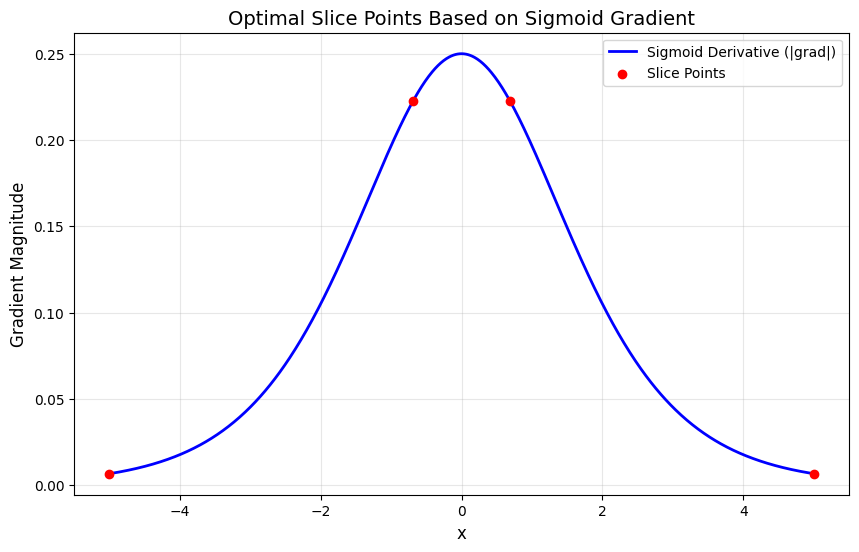

array([-5.        , -0.68568569,  0.68568569,  5.        ])

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi sigmoid dan turunan sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Domain sigmoid
x_domain = np.linspace(-5, 5, 1000)

# Gradien sigmoid
grad = np.abs(sigmoid_derivative(x_domain))

# Fungsi untuk memilih titik slice berdasarkan gradien
def select_slices(x_domain, grad, num_slices):
    """
    Memilih titik slice berdasarkan perubahan gradien.
    """
    # Normalisasi gradien
    grad_cumsum = np.cumsum(grad)  # Integral numerik dari gradien
    grad_cumsum /= grad_cumsum[-1]  # Normalisasi ke [0, 1]
    
    # Pilih titik slice pada interval yang merata di [0, 1]
    thresholds = np.linspace(0, 1, num_slices + 1)
    slices = []
    
    for t in thresholds:
        idx = np.searchsorted(grad_cumsum, t)
        slices.append(x_domain[idx])
    
    return np.array(slices)

# Pilih 4 titik slice
num_slices = 4
optimal_slices = select_slices(x_domain, grad, num_slices-1)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(x_domain, grad, label="Sigmoid Derivative (|grad|)", color="blue", linewidth=2)
plt.scatter(optimal_slices, sigmoid_derivative(optimal_slices), color="red", zorder=5, label="Slice Points")
plt.title("Optimal Slice Points Based on Sigmoid Gradient", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Gradient Magnitude", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.show()

# Output titik slice optimal
optimal_slices

## Algoritma dari blackbox AI (GACOR ALL IN)
### Optimized point for sigmoid

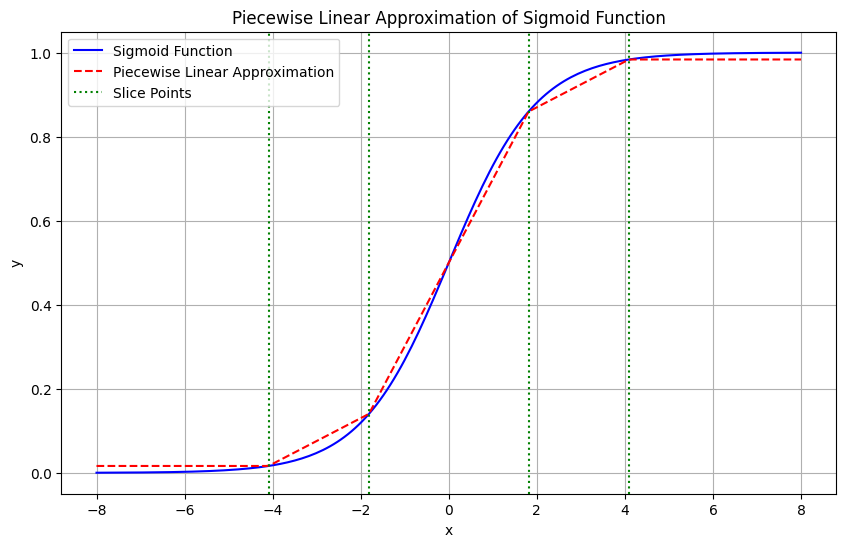

Optimal slice points: [-4.09263072 -1.81172374  1.81171603  4.09261913]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the piecewise linear function
def piecewise_linear(x, slice_points):
    # Sort slice points
    slice_points = np.sort(slice_points)
    # Create piecewise linear segments
    segments = []
    for i in range(len(slice_points) - 1):
        x1, x2 = slice_points[i], slice_points[i + 1]
        y1, y2 = sigmoid(x1), sigmoid(x2)
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        segments.append((slope, intercept, x1, x2))
    
    # Evaluate the piecewise linear function
    y = np.zeros_like(x)
    for slope, intercept, x1, x2 in segments:
        mask = (x >= x1) & (x < x2)
        y[mask] = slope * x[mask] + intercept
    
    # Handle the endpoints
    if slice_points[0] > x[0]:
        y[x < slice_points[0]] = sigmoid(slice_points[0])
    if slice_points[-1] < x[-1]:
        y[x >= slice_points[-1]] = sigmoid(slice_points[-1])
    
    return y

# Define the error function to minimize
def error_function(slice_points, x, y):
    y_approx = piecewise_linear(x, slice_points)
    return np.mean((y - y_approx) ** 2)

# Main function to find optimal slice points
def find_optimal_slices(num_slices, x_range):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 100)
    y = sigmoid(x)

    # Initial guess for slice points
    initial_slices = np.linspace(x_range[0], x_range[1], num_slices)

    # Optimize slice points
    result = minimize(error_function, initial_slices, args=(x, y), method='Nelder-Mead')
    
    return np.sort(result.x)

# Parameters
num_slices = 4
x_range = (-8, 8)

# Find optimal slice points
optimal_slices = find_optimal_slices(num_slices, x_range)

# Generate x values and sigmoid function for plotting
x_values = np.linspace(x_range[0], x_range[1], 200)
sigmoid_values = sigmoid(x_values)
piecewise_values = piecewise_linear(x_values, optimal_slices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, sigmoid_values, label='Sigmoid Function', color='blue')
plt.plot(x_values, piecewise_values, label='Piecewise Linear Approximation', color='red', linestyle='--')
plt.axvline(x=optimal_slices[0], color='green', linestyle=':', label='Slice Points')
plt.axvline(x=optimal_slices[-1], color='green', linestyle=':')
for point in optimal_slices[1:-1]:
    plt.axvline(x=point, color='green', linestyle=':')
plt.title('Piecewise Linear Approximation of Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print("Optimal slice points:", optimal_slices)

## 4 Slices Sigmoid

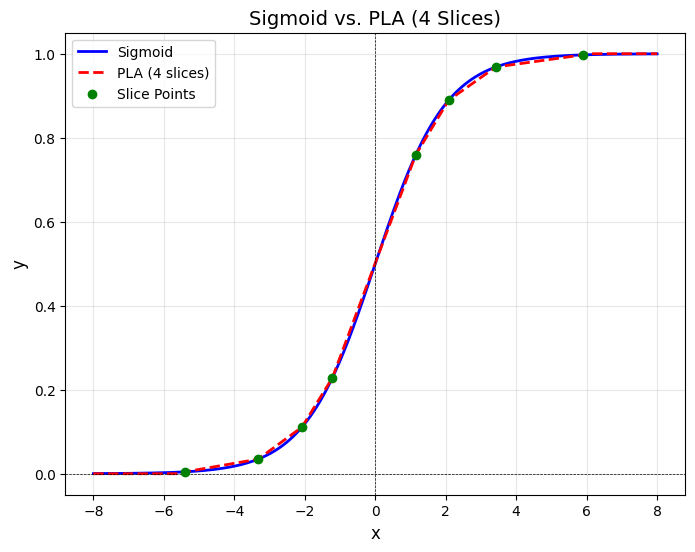

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Titik slice
x_slices = [-5.38877024, -3.32532059, -2.08119971, -1.21932566,  1.14919065,  2.08101323, 3.42018134,  5.8904377 ]

# Hitung gradien dan intersep untuk setiap slice
m_values = []
b_values = []

for i in range(len(x_slices) - 1):
    x1, x2 = x_slices[i], x_slices[i + 1]
    y1, y2 = sigmoid(x1), sigmoid(x2)
    m = (y2 - y1) / (x2 - x1)  # Gradien
    b = y1 - m * x1           # Intersep
    m_values.append(m)
    b_values.append(b)

# Fungsi PLA berdasarkan slice
def pla_sigmoid(x):
    for i in range(len(x_slices) - 1):
        if x_slices[i] <= x <= x_slices[i + 1]:
            return m_values[i] * x + b_values[i]
    return 0 if x < x_slices[0] else 1

# Generate data untuk plot
x = np.linspace(-8, 8, 500)
y_sigmoid = sigmoid(x)
y_pla = np.array([pla_sigmoid(xi) for xi in x])

# Plot fungsi sigmoid asli dan PLA
plt.figure(figsize=(8, 6))
plt.plot(x, y_sigmoid, label="Sigmoid", color="blue", linewidth=2)
plt.plot(x, y_pla, label="PLA (4 slices)", color="red", linestyle="--", linewidth=2)
plt.scatter(x_slices, sigmoid(np.array(x_slices)), color="green", zorder=5, label="Slice Points")

# Tambahkan detail plot
plt.title("Sigmoid vs. PLA (4 Slices)", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

## Algo dari blackbox AI lagi untuk softplus

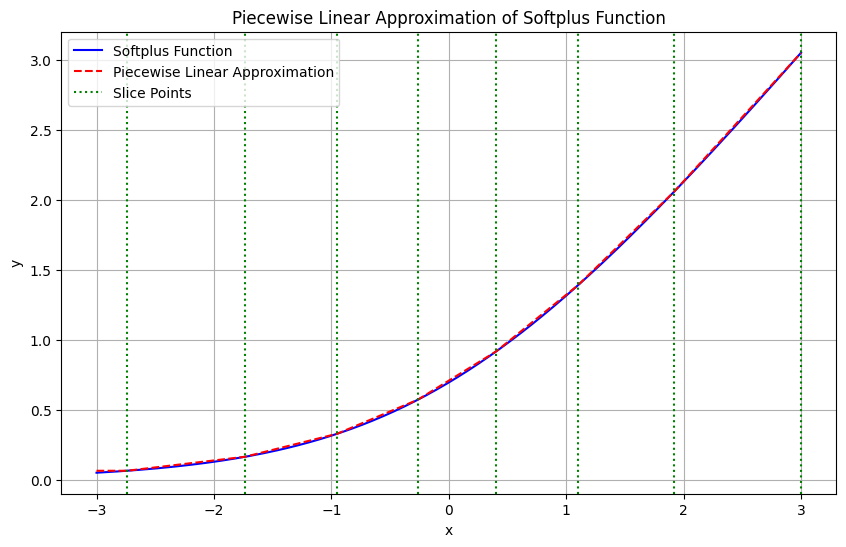

Optimal slice points: [-2.74098155 -1.73620815 -0.95204063 -0.26351916  0.40113409  1.10278705
  1.91921231  2.99767665]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the softplus function
def softplus(x):
    return np.log1p(np.exp(x))  # More stable implementation

# Define the piecewise linear function
def piecewise_linear(x, slice_points):
    # Sort slice points
    slice_points = np.sort(slice_points)
    # Create piecewise linear segments
    segments = []
    for i in range(len(slice_points) - 1):
        x1, x2 = slice_points[i], slice_points[i + 1]
        y1, y2 = softplus(x1), softplus(x2)
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        segments.append((slope, intercept, x1, x2))
    
    # Evaluate the piecewise linear function
    y = np.zeros_like(x)
    for slope, intercept, x1, x2 in segments:
        mask = (x >= x1) & (x < x2)
        y[mask] = slope * x[mask] + intercept
    
    # Handle the endpoints
    if slice_points[0] > x[0]:
        y[x < slice_points[0]] = softplus(slice_points[0])
    if slice_points[-1] < x[-1]:
        y[x >= slice_points[-1]] = softplus(slice_points[-1])
    
    return y

# Define the error function to minimize
def error_function(slice_points, x, y):
    y_approx = piecewise_linear(x, slice_points)
    return np.mean((y - y_approx) ** 2)

# Main function to find optimal slice points
def find_optimal_slices(num_slices, x_range):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 100)
    y = softplus(x)

    # Initial guess for slice points
    initial_slices = np.linspace(x_range[0], x_range[1], num_slices)

    # Optimize slice points
    result = minimize(error_function, initial_slices, args=(x, y), method='Nelder-Mead')
    
    return np.sort(result.x)

# Parameters
num_slices = 8
x_range = (-3, 3)

# Find optimal slice points
optimal_slices = find_optimal_slices(num_slices, x_range)

# Generate x values and softplus function for plotting
x_values = np.linspace(x_range[0], x_range[1], 200)
softplus_values = softplus(x_values)
piecewise_values = piecewise_linear(x_values, optimal_slices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, softplus_values, label='Softplus Function', color='blue')
plt.plot(x_values, piecewise_values, label='Piecewise Linear Approximation', color='red', linestyle='--')
plt.axvline(x=optimal_slices[0], color='green', linestyle=':', label='Slice Points')
plt.axvline(x=optimal_slices[-1], color='green', linestyle=':')
for point in optimal_slices[1:-1]:
    plt.axvline(x=point, color='green', linestyle=':')
plt.title('Piecewise Linear Approximation of Softplus Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print("Optimal slice points:", optimal_slices)

## Untuk sigmoid, udah ada intercept (c) dan slope (m)
### untuk nentuin nilai x dan jumlahnya, modifikasi di num_slices

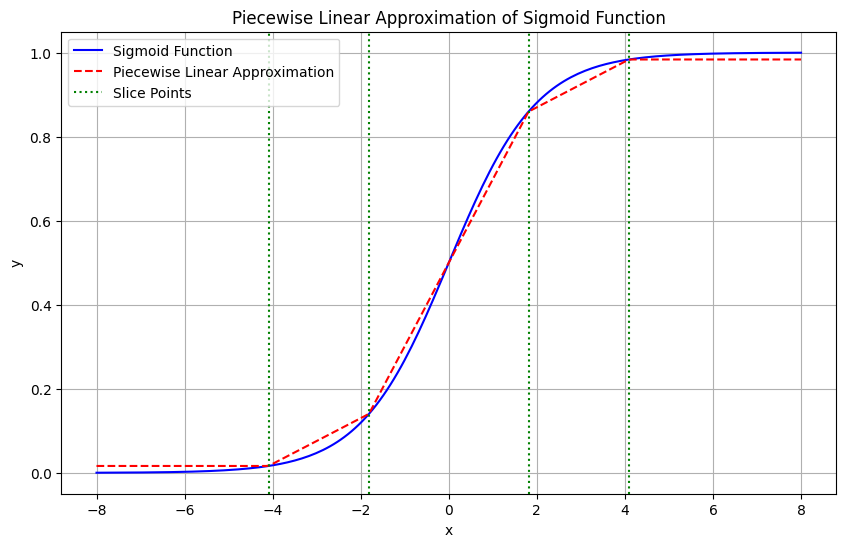

Optimal slice points: [-4.09263072 -1.81172374  1.81171603  4.09261913]
Segment 1: x in [-4.09, -1.81] -> Slope: 0.0544, Intercept: 0.2389
Segment 2: x in [-1.81, 1.81] -> Slope: 0.1985, Intercept: 0.5000
Segment 3: x in [1.81, 4.09] -> Slope: 0.0544, Intercept: 0.7611


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the piecewise linear function
def piecewise_linear(x, slice_points):
    # Sort slice points
    slice_points = np.sort(slice_points)
    segments = []
    y = np.zeros_like(x)

    for i in range(len(slice_points) - 1):
        x1, x2 = slice_points[i], slice_points[i + 1]
        y1, y2 = sigmoid(x1), sigmoid(x2)
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        segments.append((slope, intercept, x1, x2))

        # Evaluate piecewise linear segments
        mask = (x >= x1) & (x < x2)
        y[mask] = slope * x[mask] + intercept

    # Handle the endpoints
    if slice_points[0] > x[0]:
        y[x < slice_points[0]] = sigmoid(slice_points[0])
    if slice_points[-1] < x[-1]:
        y[x >= slice_points[-1]] = sigmoid(slice_points[-1])

    return y, segments

# Define the error function to minimize
def error_function(slice_points, x, y):
    y_approx, _ = piecewise_linear(x, slice_points)
    return np.mean((y - y_approx) ** 2)

# Main function to find optimal slice points
def find_optimal_slices(num_slices, x_range):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 100)
    y = sigmoid(x)

    # Initial guess for slice points
    initial_slices = np.linspace(x_range[0], x_range[1], num_slices)

    # Optimize slice points
    result = minimize(error_function, initial_slices, args=(x, y), method='Nelder-Mead')
    
    optimal_slices = np.sort(result.x)
    return optimal_slices

# Parameters
num_slices = 4
x_range = (-8, 8)

# Find optimal slice points
optimal_slices = find_optimal_slices(num_slices, x_range)

# Generate x values and sigmoid function for plotting
x_values = np.linspace(x_range[0], x_range[1], 200)
sigmoid_values = sigmoid(x_values)
piecewise_values, segments = piecewise_linear(x_values, optimal_slices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, sigmoid_values, label='Sigmoid Function', color='blue')
plt.plot(x_values, piecewise_values, label='Piecewise Linear Approximation', color='red', linestyle='--')
plt.axvline(x=optimal_slices[0], color='green', linestyle=':', label='Slice Points')
plt.axvline(x=optimal_slices[-1], color='green', linestyle=':')
for point in optimal_slices[1:-1]:
    plt.axvline(x=point, color='green', linestyle=':')
plt.title('Piecewise Linear Approximation of Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print optimal slice points and corresponding slopes and intercepts
print("Optimal slice points:", optimal_slices)
for i in range(len(segments)):
    slope, intercept, x1, x2 = segments[i]
    print(f"Segment {i + 1}: x in [{x1:.2f}, {x2:.2f}] -> Slope: {slope:.4f}, Intercept: {intercept:.4f}")

## Untuk softplus, udah ada intercept (c) dan slope (m)
### untuk nentuin nilai x dan jumlahnya, modifikasi di num_slices

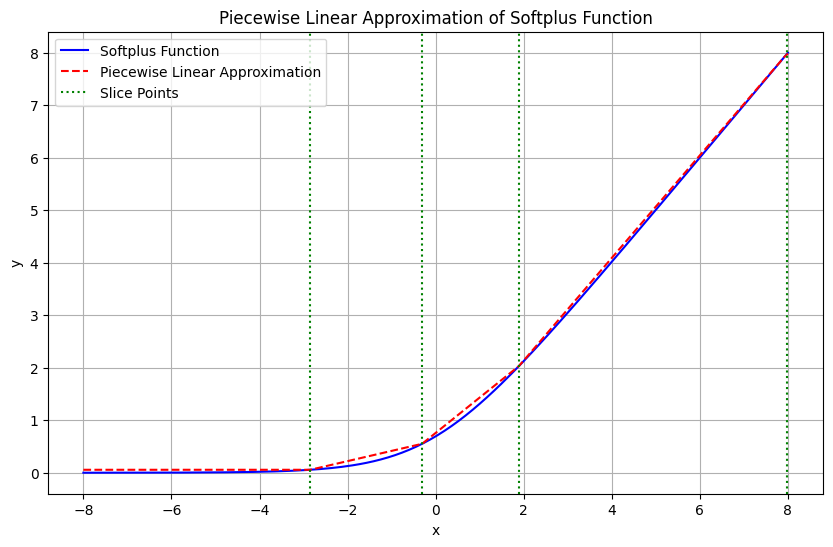

Optimal slice points: [-2.84663836 -0.30729898  1.89601904  7.98337307]
Segment 1: x in [-2.85, -0.31] -> Slope: 0.1949, Intercept: 0.6111
Segment 2: x in [-0.31, 1.90] -> Slope: 0.6738, Intercept: 0.7583
Segment 3: x in [1.90, 7.98] -> Slope: 0.9771, Intercept: 0.1834


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the softplus function
def softplus(x):
    return np.log(1 + np.exp(x))

# Define the piecewise linear function
def piecewise_linear(x, slice_points):
    # Sort slice points
    slice_points = np.sort(slice_points)
    segments = []
    y = np.zeros_like(x)

    for i in range(len(slice_points) - 1):
        x1, x2 = slice_points[i], slice_points[i + 1]
        y1, y2 = softplus(x1), softplus(x2)
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        segments.append((slope, intercept, x1, x2))

        # Evaluate piecewise linear segments
        mask = (x >= x1) & (x < x2)
        y[mask] = slope * x[mask] + intercept

    # Handle the endpoints
    if slice_points[0] > x[0]:
        y[x < slice_points[0]] = softplus(slice_points[0])
    if slice_points[-1] < x[-1]:
        y[x >= slice_points[-1]] = softplus(slice_points[-1])

    return y, segments

# Define the error function to minimize
def error_function(slice_points, x, y):
    y_approx, _ = piecewise_linear(x, slice_points)
    return np.mean((y - y_approx) ** 2)

# Main function to find optimal slice points
def find_optimal_slices(num_slices, x_range):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 100)
    y = softplus(x)

    # Initial guess for slice points
    initial_slices = np.linspace(x_range[0], x_range[1], num_slices)

    # Optimize slice points
    result = minimize(error_function, initial_slices, args=(x, y), method='Nelder-Mead')
    
    optimal_slices = np.sort(result.x)
    return optimal_slices

# Parameters
num_slices = 4
x_range = (-8, 8)

# Find optimal slice points
optimal_slices = find_optimal_slices(num_slices, x_range)

# Generate x values and softplus function for plotting
x_values = np.linspace(x_range[0], x_range[1], 200)
softplus_values = softplus(x_values)
piecewise_values, segments = piecewise_linear(x_values, optimal_slices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, softplus_values, label='Softplus Function', color='blue')
plt.plot(x_values, piecewise_values, label='Piecewise Linear Approximation', color='red', linestyle='--')
plt.axvline(x=optimal_slices[0], color='green', linestyle=':', label='Slice Points')
plt.axvline(x=optimal_slices[-1], color='green', linestyle=':')
for point in optimal_slices[1:-1]:
    plt.axvline(x=point, color='green', linestyle=':')
plt.title('Piecewise Linear Approximation of Softplus Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print optimal slice points and corresponding slopes and intercepts
print("Optimal slice points:", optimal_slices)
for i in range(len(segments)):
    slope, intercept, x1, x2 = segments[i]
    print(f"Segment {i + 1}: x in [{x1:.2f}, {x2:.2f}] -> Slope: {slope:.4f}, Intercept: {intercept:.4f}")

## RUN INI DULU SEBELUM RUN REVAMP

In [ ]:
def float_to_custom_binary(float_value):
    # Determine the sign bit
    sign_bit = 0 if float_value >= 0 else 1

    # Get the absolute value of the float for further processing
    abs_value = abs(float_value)

    # Separate the integer and fractional parts
    integer_part = int(abs_value)
    fractional_part = abs_value - integer_part

    # Convert the integer part to binary (4 bits)
    integer_binary = format(integer_part & 0b1111, '04b')

    # Convert the fractional part to binary (27 bits)
    fractional_binary = ''
    for _ in range(27):
        fractional_part *= 2
        bit = int(fractional_part)
        fractional_binary += str(bit)
        fractional_part -= bit

    # Combine all parts into a single binary string
    custom_binary = f"{sign_bit}{integer_binary}{fractional_binary}"

    return custom_binary

## Revamp Sigmoid
### Menghasilkan slope dan intercept di antara range juga

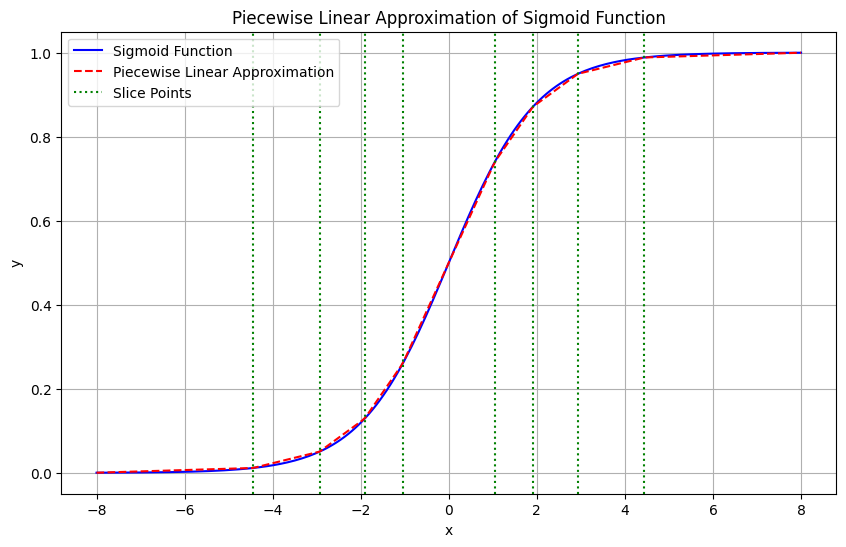

Optimal slice points: [-4.44276609 -2.93410561 -1.91285689 -1.04369786  1.04370402  1.91289759
  2.93408826  4.44283306]
Segment 1: x in [-8.00, -4.44] -> Slope: 0.0032, Intercept: 0.0257
Segment 2: x in [-4.44, -2.93] -> Slope: 0.0258, Intercept: 0.1261
Segment 3: x in [-2.93, -1.91] -> Slope: 0.0765, Intercept: 0.2751
Segment 4: x in [-1.91, -1.04] -> Slope: 0.1516, Intercept: 0.4187
Segment 5: x in [-1.04, 1.04] -> Slope: 0.2295, Intercept: 0.5000
Segment 6: x in [1.04, 1.91] -> Slope: 0.1516, Intercept: 0.5813
Segment 7: x in [1.91, 2.93] -> Slope: 0.0765, Intercept: 0.7249
Segment 8: x in [2.93, 4.44] -> Slope: 0.0258, Intercept: 0.8739
Segment 9: x in [4.44, 8.00] -> Slope: 0.0032, Intercept: 0.9743
KODE BINER
Optimal slice points: ['1010001110001010110010001111001', '1001011101111001000011000101110', '1000111101001101100001111110101', '1000100001011001011111100100001', '0000100001011001100000010111110', '0000111101001101100111010100000', '0001011101111001000000110100010', '00100

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the piecewise linear function
def piecewise_linear(x, slice_points):
    # Sort slice points
    slice_points = np.sort(slice_points)
    segments = []
    y = np.zeros_like(x)

    # Handle the segment from the left endpoint to the first slice point
    x1 = slice_points[0]
    y1 = sigmoid(x1)
    slope = (y1 - sigmoid(x[0])) / (x1 - x[0]) if x[0] < x1 else 0
    intercept = sigmoid(x[0]) - slope * x[0]
    segments.append((slope, intercept, x[0], x1))
    
    # Evaluate the first segment
    mask = (x >= x[0]) & (x < x1)
    y[mask] = slope * x[mask] + intercept

    # Iterate through slice points to create segments
    for i in range(len(slice_points) - 1):
        x1, x2 = slice_points[i], slice_points[i + 1]
        y1, y2 = sigmoid(x1), sigmoid(x2)
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        segments.append((slope, intercept, x1, x2))

        # Evaluate piecewise linear segments
        mask = (x >= x1) & (x < x2)
        y[mask] = slope * x[mask] + intercept

    # Handle the segment from the last slice point to the right endpoint
    x1 = slice_points[-1]
    y1 = sigmoid(x1)
    slope = (sigmoid(x[-1]) - y1) / (x[-1] - x1) if x[-1] > x1 else 0
    intercept = y1 - slope * x1
    segments.append((slope, intercept, x1, x[-1]))

    # Evaluate the last segment
    mask = (x >= x1)
    y[mask] = slope * x[mask] + intercept

    return y, segments

# Define the error function to minimize
def error_function(slice_points, x, y):
    y_approx, _ = piecewise_linear(x, slice_points)
    return np.mean((y - y_approx) ** 2)

# Main function to find optimal slice points
def find_optimal_slices(num_slices, x_range):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 100)
    y = sigmoid(x)

    # Initial guess for slice points
    initial_slices = np.linspace(x_range[0], x_range[1], num_slices)

    # Optimize slice points
    result = minimize(error_function, initial_slices, args=(x, y), method='Nelder-Mead')
    
    optimal_slices = np.sort(result.x)
    return optimal_slices

# Parameters
num_slices = 8
x_range = (-8, 8)

# Find optimal slice points
optimal_slices = find_optimal_slices(num_slices, x_range)

# Generate x values and sigmoid function for plotting
x_values = np.linspace(x_range[0], x_range[1], 200)
sigmoid_values = sigmoid(x_values)
piecewise_values, segments = piecewise_linear(x_values, optimal_slices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, sigmoid_values, label='Sigmoid Function', color='blue')
plt.plot(x_values, piecewise_values, label='Piecewise Linear Approximation', color='red', linestyle='--')
plt.axvline(x=optimal_slices[0], color='green', linestyle=':', label='Slice Points')
plt.axvline(x=optimal_slices[-1], color='green', linestyle=':')
for point in optimal_slices[1:-1]:
    plt.axvline(x=point, color='green', linestyle=':')
plt.title('Piecewise Linear Approximation of Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print optimal slice points and corresponding slopes and intercepts
print("Optimal slice points:", optimal_slices)
for i in range(len(segments)):
 slope, intercept, x1, x2 = segments[i]
 print(f"Segment {i + 1}: x in [{x1:.2f}, {x2:.2f}] -> Slope: {slope:.4f}, Intercept: {intercept:.4f}")

# Print optimal slice points and corresponding slopes and intercepts in custom binary format
print("KODE BINER")
print("Optimal slice points:", [float_to_custom_binary(x) for x in optimal_slices])
for i in range(len(segments)):
    slope, intercept, x1, x2 = segments[i]
    slope_binary = float_to_custom_binary(slope)
    intercept_binary = float_to_custom_binary(intercept)
    print(f"Segment {i + 1}: x in [{x1:.2f}, {x2:.2f}] -> Slope: {slope_binary}, Intercept: {intercept_binary}")

## Revamp Softplus
### Menghasilkan slope dan intercept di antara range juga

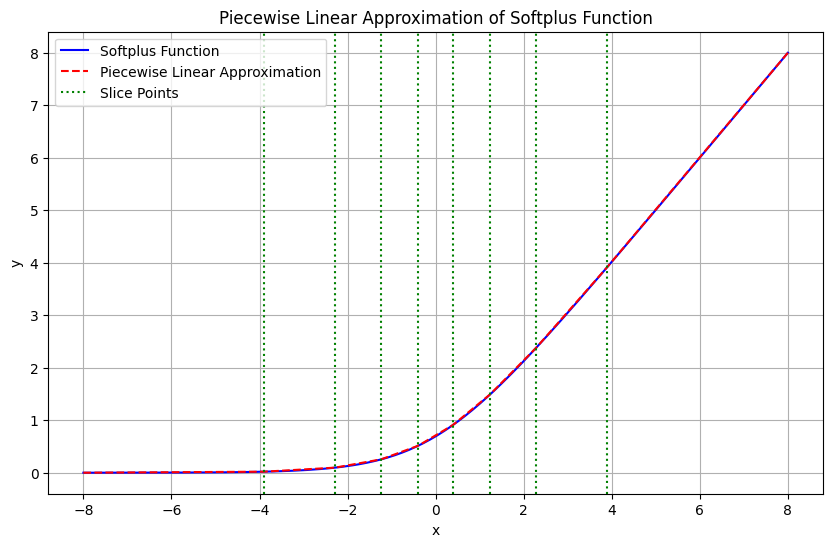

Optimal slice points: [-3.89013809 -2.27923567 -1.2334574  -0.39581795  0.39366939  1.23075987
  2.28332082  3.88963558]
Segment 1: x in [-8.00, -3.89] -> Slope: 0.0048, Intercept: 0.0391
Segment 2: x in [-3.89, -2.28] -> Slope: 0.0479, Intercept: 0.2067
Segment 3: x in [-2.28, -1.23] -> Slope: 0.1513, Intercept: 0.4422
Segment 4: x in [-1.23, -0.40] -> Slope: 0.3093, Intercept: 0.6371
Segment 5: x in [-0.40, 0.39] -> Slope: 0.4997, Intercept: 0.7125
Segment 6: x in [0.39, 1.23] -> Slope: 0.6902, Intercept: 0.6375
Segment 7: x in [1.23, 2.28] -> Slope: 0.8488, Intercept: 0.4424
Segment 8: x in [2.28, 3.89] -> Slope: 0.9522, Intercept: 0.2063
Segment 9: x in [3.89, 8.00] -> Slope: 0.9952, Intercept: 0.0391
KODE BINER
Optimal slice points: ['1001111100011111000000001011011', '1001001000111011110111111110100', '1000100111011110000111101110100', '1000001100101010101000101001101', '0000001100100110001111000010001', '0000100111011000100110001010000', '0001001001000100001111011011010', '00011

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the softplus function
def softplus(x):
    return np.log(1 + np.exp(x))

# Define the piecewise linear function
def piecewise_linear(x, slice_points):
    # Sort slice points
    slice_points = np.sort(slice_points)
    segments = []
    y = np.zeros_like(x)

    # Handle the segment from the left endpoint to the first slice point
    x1 = slice_points[0]
    y1 = softplus(x1)
    slope = (y1 - softplus(x[0])) / (x1 - x[0]) if x[0] < x1 else 0
    intercept = softplus(x[0]) - slope * x[0]
    segments.append((slope, intercept, x[0], x1))
    
    # Evaluate the first segment
    mask = (x >= x[0]) & (x < x1)
    y[mask] = slope * x[mask] + intercept

    # Iterate through slice points to create segments
    for i in range(len(slice_points) - 1):
        x1, x2 = slice_points[i], slice_points[i + 1]
        y1, y2 = softplus(x1), softplus(x2)
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        segments.append((slope, intercept, x1, x2))

        # Evaluate piecewise linear segments
        mask = (x >= x1) & (x < x2)
        y[mask] = slope * x[mask] + intercept

    # Handle the segment from the last slice point to the right endpoint
    x1 = slice_points[-1]
    y1 = softplus(x1)
    slope = (softplus(x[-1]) - y1) / (x[-1] - x1) if x[-1] > x1 else 0
    intercept = y1 - slope * x1
    segments.append((slope, intercept, x1, x[-1]))

    # Evaluate the last segment
    mask = (x >= x1)
    y[mask] = slope * x[mask] + intercept

    return y, segments

# Define the error function to minimize
def error_function(slice_points, x, y):
    y_approx, _ = piecewise_linear(x, slice_points)
    return np.mean((y - y_approx) ** 2)

# Main function to find optimal slice points
def find_optimal_slices(num_slices, x_range):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 100)
    y = softplus(x)

    # Initial guess for slice points
    initial_slices = np.linspace(x_range[0], x_range[1], num_slices)

    # Define bounds for the slice points to ensure they remain within the range
    bounds = [(x_range[0], x_range[1]) for _ in range(num_slices)]

    # Optimize slice points
    result = minimize(error_function, initial_slices, args=(x, y), bounds=bounds, method='L-BFGS-B')
    
    optimal_slices = np.sort(result.x)
    return optimal_slices

# Parameters
num_slices = 8
x_range = (-8, 8)

# Find optimal slice points
optimal_slices = find_optimal_slices(num_slices, x_range)

# Generate x values and softplus function for plotting
x_values = np.linspace(x_range[0], x_range[1], 200)
softplus_values = softplus(x_values)
piecewise_values, segments = piecewise_linear(x_values, optimal_slices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, softplus_values, label='Softplus Function', color='blue')
plt.plot(x_values, piecewise_values, label='Piecewise Linear Approximation', color='red', linestyle='--')
plt.axvline(x=optimal_slices[0], color='green', linestyle=':', label='Slice Points')
plt.axvline(x=optimal_slices[-1], color='green', linestyle=':')
for point in optimal_slices[1:-1]:
    plt.axvline(x=point, color='green', linestyle=':')
plt.title('Piecewise Linear Approximation of Softplus Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print optimal slice points and corresponding slopes and intercepts
print("Optimal slice points:", optimal_slices)
for i in range(len(segments)):
    slope, intercept, x1, x2 = segments[i]
    print(f"Segment {i + 1}: x in [{x1:.2f}, {x2:.2f}] -> Slope: {slope:.4f}, Intercept: {intercept:.4f}")

# Print optimal slice points and corresponding slopes and intercepts in custom binary format
print("KODE BINER")
print("Optimal slice points:", [float_to_custom_binary(x) for x in optimal_slices])
for i in range(len(segments)):
    slope, intercept, x1, x2 = segments[i]
    slope_binary = float_to_custom_binary(slope)
    intercept_binary = float_to_custom_binary(intercept)
    print(f"Segment {i + 1}: x in [{x1:.2f}, {x2:.2f}] -> Slope: {slope_binary}, Intercept: {intercept_binary}")